In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt



In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [8]:
len(dataset)
# shows 68 because we have divided the dataset into batches of 32 and we have a total of 68 batches 

68

In [9]:
68*32
# shows > 2152 indicating that the last batch is not perfect. Total size is batches*batch_size (68*32)

2176

In [10]:
for image_batch, label_batch in dataset.take(1):    # take(1) means taking the first batch
    print(image_batch.shape)
    print(label_batch.numpy())  # convert all the elements (classes) into numpy 
    # 0 is Potato___Early_blight
    # 1 is Potato___Late_blight
    # 2 is Potato___healthy
    # (32, 256, 256, 3) means 32 images, each of size 256 x 256, 3 RGB channels

(32, 256, 256, 3)
[2 2 0 0 1 0 1 0 0 1 2 0 0 1 0 1 0 1 1 2 1 1 1 0 0 1 0 0 1 0 1 1]


In [11]:
for image_batch, label_batch in dataset.take(1):  
    print(image_batch[0])   # each image is a tensor 

tf.Tensor(
[[[149. 137. 141.]
  [159. 147. 151.]
  [151. 139. 143.]
  ...
  [182. 174. 172.]
  [190. 182. 180.]
  [184. 176. 174.]]

 [[151. 139. 143.]
  [134. 122. 126.]
  [140. 128. 132.]
  ...
  [186. 178. 176.]
  [190. 182. 180.]
  [182. 174. 172.]]

 [[121. 109. 113.]
  [132. 120. 124.]
  [157. 145. 149.]
  ...
  [189. 181. 179.]
  [191. 183. 181.]
  [180. 172. 170.]]

 ...

 [[153. 140. 147.]
  [147. 134. 141.]
  [149. 136. 143.]
  ...
  [164. 154. 162.]
  [162. 152. 160.]
  [162. 152. 160.]]

 [[132. 119. 126.]
  [128. 115. 122.]
  [131. 118. 125.]
  ...
  [165. 155. 163.]
  [166. 156. 164.]
  [168. 158. 166.]]

 [[128. 115. 122.]
  [126. 113. 120.]
  [132. 119. 126.]
  ...
  [151. 141. 149.]
  [154. 144. 152.]
  [160. 150. 158.]]], shape=(256, 256, 3), dtype=float32)


In [12]:
for image_batch, label_batch in dataset.take(1):  
    print(image_batch[0].numpy())   # converting tensor image into numpy

[[[184. 179. 183.]
  [189. 184. 188.]
  [193. 188. 192.]
  ...
  [179. 174. 180.]
  [183. 178. 184.]
  [187. 182. 188.]]

 [[182. 177. 181.]
  [189. 184. 188.]
  [193. 188. 192.]
  ...
  [177. 172. 178.]
  [180. 175. 181.]
  [183. 178. 184.]]

 [[186. 181. 185.]
  [192. 187. 191.]
  [196. 191. 195.]
  ...
  [182. 177. 183.]
  [183. 178. 184.]
  [184. 179. 185.]]

 ...

 [[133. 127. 131.]
  [144. 138. 142.]
  [161. 155. 159.]
  ...
  [138. 135. 144.]
  [141. 138. 147.]
  [161. 158. 167.]]

 [[153. 147. 151.]
  [159. 153. 157.]
  [163. 157. 161.]
  ...
  [167. 161. 171.]
  [156. 150. 160.]
  [134. 128. 138.]]

 [[148. 142. 146.]
  [156. 150. 154.]
  [158. 152. 156.]
  ...
  [150. 144. 154.]
  [153. 147. 157.]
  [152. 146. 156.]]]


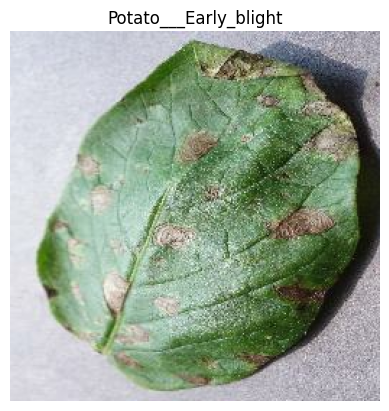

In [13]:
# printing the first image using matplotlib.pyplot
for image_batch, label_batch in dataset.take(1):  
    plt.imshow(image_batch[0].numpy().astype("uint8")) 
    plt.title(class_names[label_batch[0]])
    plt.axis("off") 

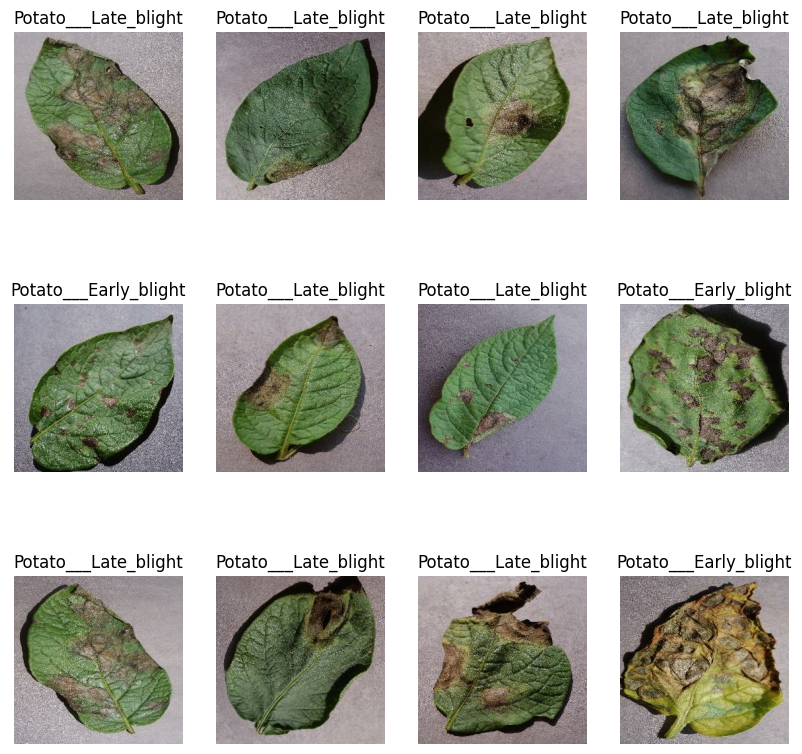

In [14]:
# printing the first 12 images using matplotlib.pyplot
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):  
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[label_batch[i]])
        plt.axis("off") 

In [15]:
# Splitting the dataset into validation, train and test
# We have 68 batches each containing 32 images
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [16]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [17]:
# Training dataset
train_ds = dataset.take(54)
len(train_ds)   

54

In [18]:
test_ds_temp = dataset.skip(54)
len(test_ds_temp)

14

In [19]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [20]:
# Validation dataset
val_ds = test_ds_temp.take(6)
len(val_ds)

6

In [21]:
# Test dataset
test_ds = test_ds_temp.skip(6)
len(test_ds)

8

In [22]:
# Making a compact function for splitting into train, validation, test
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)

    if shuffle: 
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [23]:
# Apply the function of splitting on our dataset
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

In [27]:
# Catching and prefetching are done to optimize the data sets so they run faster
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [28]:
# Preprocessing -> Resizing, Rescaling 
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [29]:
# Preprocessing -> Using of data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [30]:
# model building, defining the neural network architecture
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    # Convolution + Relu
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    # Pooling (reduction in size)
    layers.MaxPooling2D((2,2)),
    # Stacking a few MaxPooling and Conv2D layers for trial and error 
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # Flattening
    layers.Flatten(),
    layers.Dense(64, activation='relu'), # Adding dense layer of 64 neurons
    layers.Dense(n_classes, activation='softmax'),  # Adding dense layer of 3 neurons on the last layer
    # Softmax actiavation function will normalise the probability of the classes
])
# Api
model.build(input_shape = input_shape)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compiling using optimizers
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']    # Using accuracy matrix to track the gradient descent (tracking the training process)
)

In [36]:
# Training the network
history = model.fit(
    train_ds,
    epochs=25,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9627 - loss: 0.1184 - val_accuracy: 0.9688 - val_loss: 0.0859
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9423 - loss: 0.1432 - val_accuracy: 0.9792 - val_loss: 0.0778
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9753 - loss: 0.0827 - val_accuracy: 0.9740 - val_loss: 0.0931
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9712 - loss: 0.0877 - val_accuracy: 0.9844 - val_loss: 0.0772
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9778 - loss: 0.0570 - val_accuracy: 0.9688 - val_loss: 0.0733
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9713 - loss: 0.0781 - val_accuracy: 0.9531 - val_loss: 0.1215
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9811 - loss: 0.0503 - val_accuracy: 0.8802 - val_loss: 0.3247
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9834 - loss: 0.0642 - val_accuracy: 0.9323 - v

In [39]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step - accuracy: 1.0000 - loss: 0.0114


In [40]:
scores

[0.00975566916167736, 1.0]

In [41]:
history

In [42]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
history.history['accuracy']

[0.9618055820465088,
 0.9473379850387573,
 0.9722222089767456,
 0.9652777910232544,
 0.9791666865348816,
 0.9739583134651184,
 0.9780092835426331,
 0.9820601940155029,
 0.9618055820465088,
 0.9797453880310059,
 0.9791666865348816,
 0.9866898059844971,
 0.9884259104728699,
 0.9837962985038757,
 0.9756944179534912,
 0.9751157164573669,
 0.9849537014961243,
 0.9866898059844971,
 0.9837962985038757,
 0.9872685074806213,
 0.9924768805503845,
 0.9890046119689941,
 0.9733796119689941,
 0.9820601940155029,
 0.9901620149612427]

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

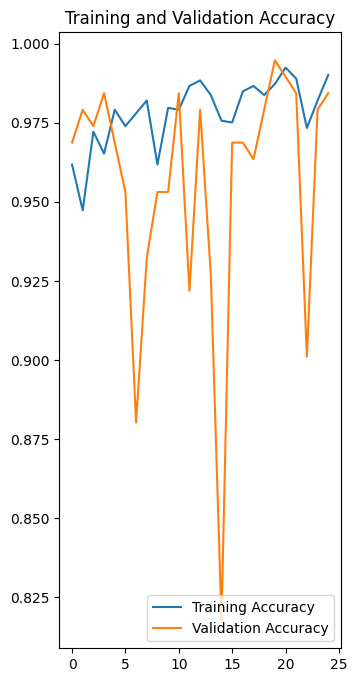

In [54]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(25), acc, label='Training Accuracy') # 25 is epochs
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
[4.876251e-09 1.000000e+00 1.435937e-09]
predicted label: Potato___Late_blight


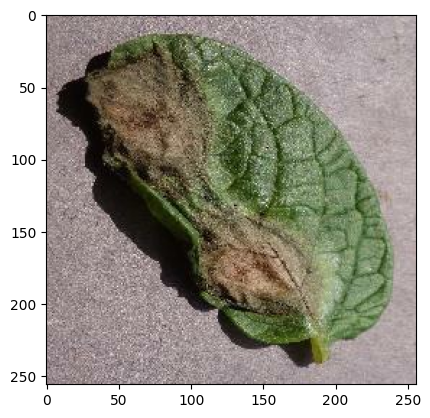

In [93]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [95]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)    # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]    # Predicting the class
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


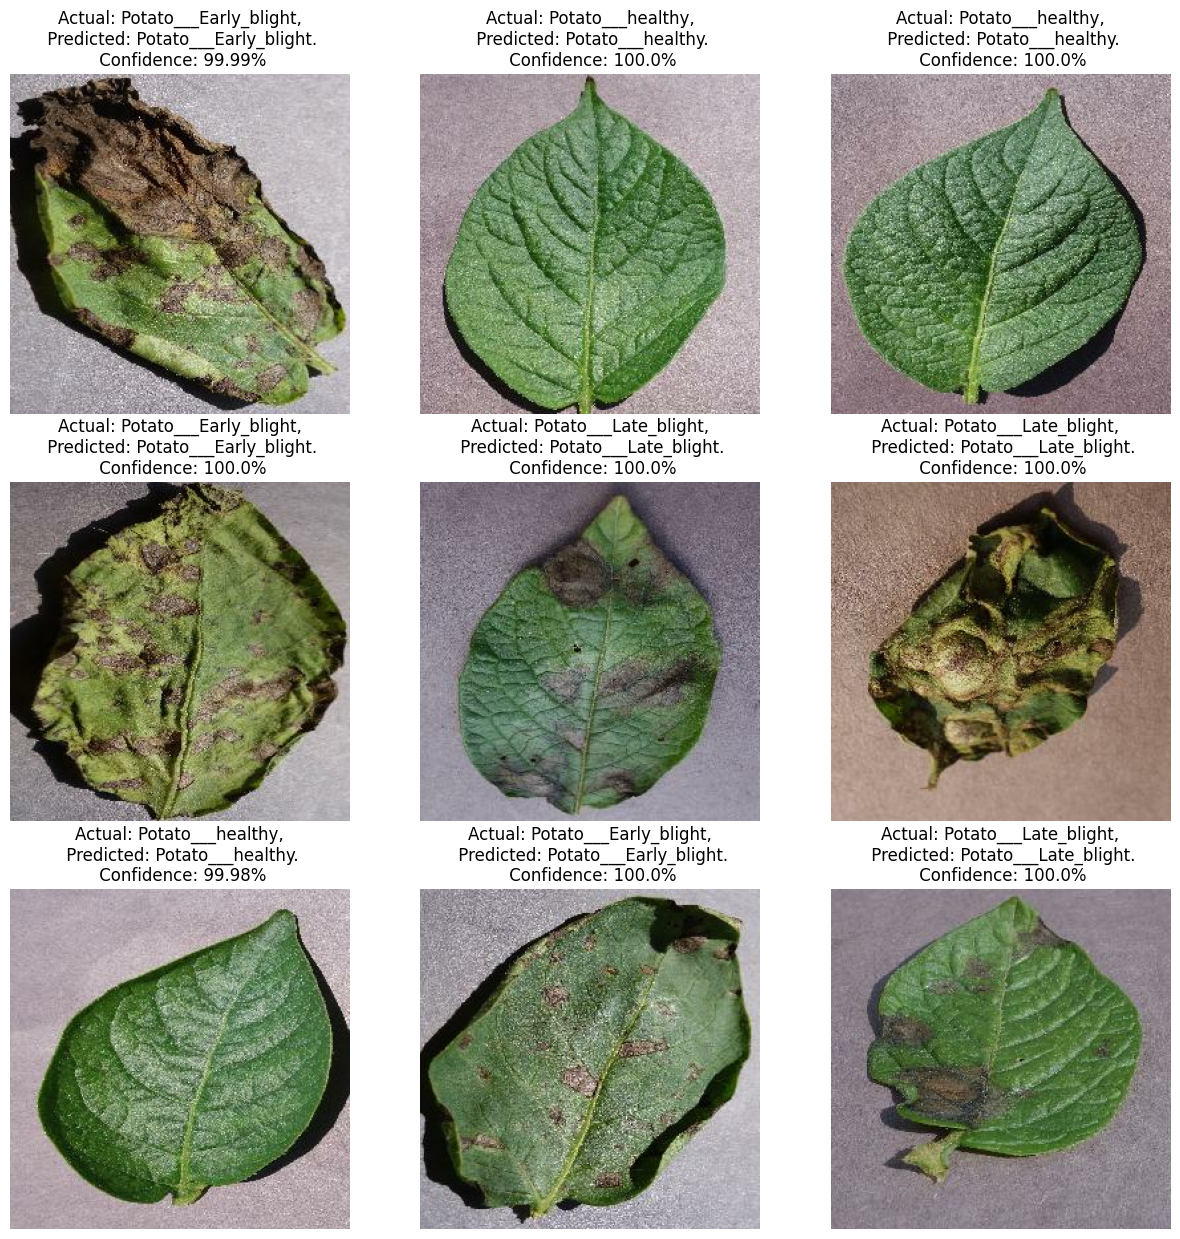

In [101]:
# Running my prediction on the entire batch
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [121]:
import os

# Get the highest model version number from the filenames
model_version = max(
    [int(i.split('.')[0]) for i in os.listdir("models/") if i.endswith('.keras')] + [0]
) + 1

# Save the model with the new version number
model.save(f"models/{model_version}.keras")
